In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
data =pd.read_csv('cybersecurity_intrusion_data.csv')
data.head

<bound method NDFrame.head of      session_id  network_packet_size protocol_type  login_attempts  \
0     SID_00001                  599           TCP               4   
1     SID_00002                  472           TCP               3   
2     SID_00003                  629           TCP               3   
3     SID_00004                  804           UDP               4   
4     SID_00005                  453           TCP               5   
...         ...                  ...           ...             ...   
9532  SID_09533                  194          ICMP               3   
9533  SID_09534                  380           TCP               3   
9534  SID_09535                  664           TCP               5   
9535  SID_09536                  406           TCP               4   
9536  SID_09537                  340           TCP               6   

      session_duration encryption_used  ip_reputation_score  failed_logins  \
0           492.983263             DES             

In [48]:
data.shape

(9537, 11)

In [49]:
data.drop(columns=["session_id"], inplace=True) 

#drop the session_id column


In [50]:
data = pd.get_dummies(data, columns=["protocol_type"], drop_first=True) 

#reduce the number of coulmns of the protocol_type into only two columns labeled either 0 or 1 if both columns are zero then its TCP protocol  


In [51]:
print(data.isnull().sum())


network_packet_size       0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
protocol_type_TCP         0
protocol_type_UDP         0
dtype: int64


In [53]:
# Make a copy so we don't affect your original DataFrame
data_corr = data.copy()

# One-hot encode categorical columns (include all dummies to see their individual impact)
data_corr = pd.get_dummies(data_corr, columns=['encryption_used', 'browser_type'], drop_first=False)


In [54]:
# Compute correlations
correlation_matrix = data_corr.corr()

# Sort by correlation with attack_detected
correlation_with_target = correlation_matrix['attack_detected'].sort_values(ascending=False)

# Display top correlations (optional)
print(correlation_with_target.head(10))

attack_detected         1.000000
failed_logins           0.363726
login_attempts          0.277320
ip_reputation_score     0.211540
browser_type_Unknown    0.134630
session_duration        0.041602
unusual_time_access     0.008652
encryption_used_DES     0.008306
protocol_type_UDP       0.007903
protocol_type_TCP       0.000643
Name: attack_detected, dtype: float64


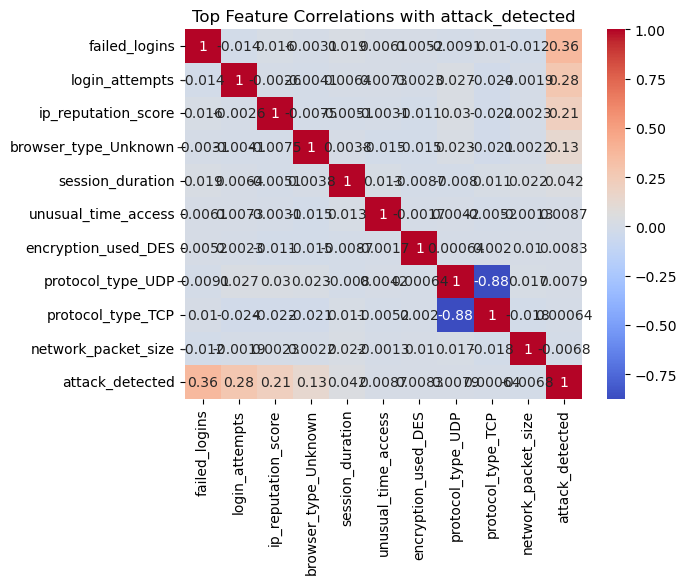

In [55]:
# Focused heatmap (optional: top 10 features most correlated with attack_detected)
top_features = correlation_with_target[1:11].index  # Skip 'attack_detected' itself
sns.heatmap(data_corr[top_features.tolist() + ['attack_detected']].corr(), annot=True, cmap='coolwarm')
plt.title("Top Feature Correlations with attack_detected")
plt.show()


In [56]:
data.drop(columns=['encryption_used'], inplace=True) #due to poor correlation of the encryption_used feature it will be droped

In [57]:
print(data.columns)

Index(['network_packet_size', 'login_attempts', 'session_duration',
       'ip_reputation_score', 'failed_logins', 'browser_type',
       'unusual_time_access', 'attack_detected', 'protocol_type_TCP',
       'protocol_type_UDP'],
      dtype='object')


In [59]:
categorical_cols = ['browser_type']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [60]:
data.head

<bound method NDFrame.head of       network_packet_size  login_attempts  session_duration  \
0                     599               4        492.983263   
1                     472               3       1557.996461   
2                     629               3         75.044262   
3                     804               4        601.248835   
4                     453               5        532.540888   
...                   ...             ...               ...   
9532                  194               3        226.049889   
9533                  380               3        182.848475   
9534                  664               5         35.170248   
9535                  406               4         86.664703   
9536                  340               6         86.876744   

      ip_reputation_score  failed_logins  unusual_time_access  \
0                0.606818              1                    0   
1                0.301569              0                    0   
2                0

In [61]:
data = data.astype(int)


In [62]:
data.head

<bound method NDFrame.head of       network_packet_size  login_attempts  session_duration  \
0                     599               4               492   
1                     472               3              1557   
2                     629               3                75   
3                     804               4               601   
4                     453               5               532   
...                   ...             ...               ...   
9532                  194               3               226   
9533                  380               3               182   
9534                  664               5                35   
9535                  406               4                86   
9536                  340               6                86   

      ip_reputation_score  failed_logins  unusual_time_access  \
0                       0              1                    0   
1                       0              0                    0   
2                 

In [66]:
# Separate features and label
X = data.drop('attack_detected', axis=1)
y = data['attack_detected']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)
